# Tema 2 - ML aplicat

## 1. Explorarea datelor

In [3]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Citirea datelor

In [5]:
def read_csv(file_path):
    """
    Funcția citește un fișier CSV și returnează un DataFrame Pandas
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Fișierul '{file_path}' nu a fost găsit.")
    except pd.errors.EmptyDataError:
        print(f"Fișierul '{file_path}' este gol.")
    except pd.errors.ParserError:
        print(f"A existat o eroare la parsarea fișierului '{file_path}'.")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

In [349]:
full_file = './tema2_SalaryPrediction/SalaryPrediction_full.csv'
train_file = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
test_file = './tema2_SalaryPrediction/SalaryPrediction_test.csv'

full_file_avc = './tema2_SalaryPrediction/SalaryPrediction_full.csv'
train_file_avc = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
test_file_avc = './tema2_SalaryPrediction/SalaryPrediction_test.csv'

### Analiza atributelor numerice

In [7]:
def generate_numerical_atributes_statistic(df):
    """
    Funcția extrage statistici pentru atributele numerice continue și generează grafice Boxplot.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    stats = df.describe(percentiles=[.25, .5, .75], include=[np.number])
    print("Statistici pentru atributele numerice continue:\n")
    print(stats, '\n')

    # Generează grafice Boxplot
    plt.figure(figsize=(10, 8))
    df.boxplot()
    plt.title('Boxplot pentru atributele numerice continue')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Extrage statistici și generează grafice Boxplot
X_train = read_csv(full_file_avc)
generate_numerical_atributes_statistic(X_train)

TypeError: read_csv() missing 1 required positional argument: 'file_path'

### Analiza atributelor categorice sau ordinale

In [9]:
def generate_discrete_atributes_statistics(df):
    """
    Funcția extrage statistici pentru atributele discrete sau ordinale.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    print("Statistici pentru atributele discrete sau ordinale:\n")

    # Selectează coloanele discrete sau ordinale
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    stats_df = pd.DataFrame(columns=[
        'Atribut', 'Număr de exemple (fără valori lipsă)', 'Număr de valori unice'
    ])

    # Calculează statisticile pentru fiecare coloană discretă sau ordinală
    stats_list = []
    for col in categorical_columns:
        col_data = df[col]
        stats_list.append({
            'Atribut': col,
            'Număr de exemple (fără valori lipsă)': col_data.count(),
            'Număr de valori unice': col_data.nunique()
        })

    # Convertește lista de statistici într-un DataFrame
    stats_df = pd.DataFrame(stats_list)
    
    print(stats_df, "\n")


    #################### Varianta 2 ######################
    stats = df.describe(include=['O', 'category'])
    stats = stats.loc[['count', 'unique']]
    # print(stats, '\n')

    # Afișează histogramă
    for col in categorical_columns:
        # Obține seria de frecvență a valorilor unice
        col_value_counts = df[col].value_counts()
        # Crează o histogrmă cu frecvențele valorilor unice
        col_value_counts.hist()
    

Statistici pentru atributele discrete sau ordinale:

     Atribut  Număr de exemple (fără valori lipsă)  Număr de valori unice
0   relation                                  7999                      6
1    country                                  7999                     40
2        job                                  7999                     14
3  work_type                                  7999                      9
4    partner                                  7999                      7
5        edu                                  7999                     16
6     gender                                  7199                      2
7       race                                  7999                      5
8      gtype                                  7999                      2
9      money                                  7999                      2 



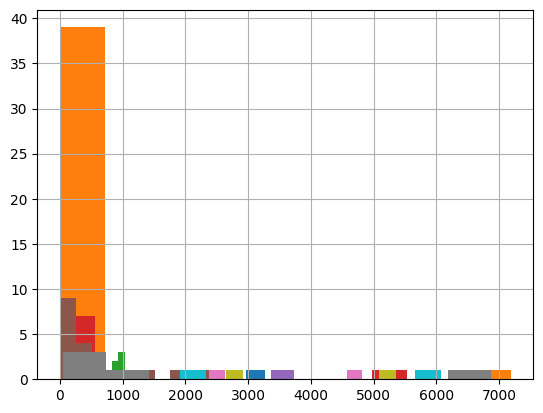

In [70]:
generate_discrete_atributes_statistics(X_train)

### Analiza corelației între atribute

In [46]:
def numerical_atributes_corelation_analysis(df, display: bool = False):
    """
    Funcția analizează corelația între atributele numerice utilizând criteriul Pearson și
    afișează matricea de corelație utilizând matshow.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează doar atributele numerice
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numerical_columns]

    # Calculează matricea de corelație
    corr_matrix = df.corr()

    if display == True:
        print("Matricea de corelație pentru atributele numerice:")
        print(corr_matrix, "\n")
        
        # Vizualizează matricea de corelație
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
        fig.colorbar(cax)
        ticks = np.arange(0, len(df.columns), 1)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xticklabels(df.columns)
        ax.set_yticklabels(df.columns)
        plt.show()

    return corr_matrix

# Printează matricea de corelație pentru atributele numerice
def print_corr_matrix(corr_matrix):
    """
    Funcția afișează matricea de corelație utilizând matshow.

    :param corr_matrix: Matricea de corelație
    """
    print("Matricea de corelație pentru atributele numerice:")
    print(corr_matrix, "\n")
    
    # Vizualizează matricea de corelație
    fig = plt.figure(figsize=(120, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

Matricea de corelație pentru atributele numerice:
              fnl       hpw      gain   edu_int     years      loss      prod
fnl      1.000000 -0.025549  0.009165  0.009604 -0.071192 -0.009559  0.009156
hpw     -0.025549  1.000000  0.100945  0.012033  0.068477  0.045460  0.100957
gain     0.009165  0.100945  1.000000  0.011041  0.088951 -0.028738  0.999998
edu_int  0.009604  0.012033  0.011041  1.000000 -0.005256  0.008728  0.011030
years   -0.071192  0.068477  0.088951 -0.005256  1.000000  0.045554  0.089012
loss    -0.009559  0.045460 -0.028738  0.008728  0.045554  1.000000 -0.028722
prod     0.009156  0.100957  0.999998  0.011030  0.089012 -0.028722  1.000000 



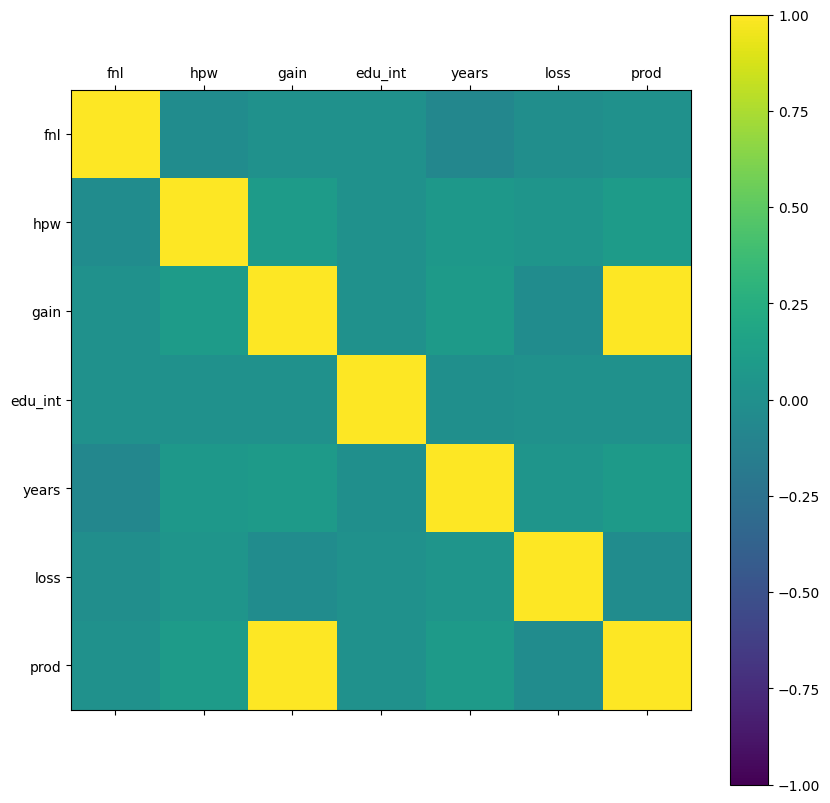

In [71]:
# Analizează corelația între atributele numerice
corr_matrix = numerical_atributes_corelation_analysis(X_train, display=True)

# Afișează matricea de corelație
# print_corr_matrix(corr_matrix)

In [92]:
from scipy.stats import chi2_contingency

def category_atributes_corelation_analysis(df, display: bool = False):
    """
    Funcția analizează corelația între atributele categorice utilizând testul Chi-Pătrat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează coloanele categorice
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Setează nivelul de semnificație
    alpha = 0.05

    # Generează testele Chi-Pătrat pentru fiecare pereche de coloane categorice
    chi2_results = []
    to_drop = set()
    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i + 1:]:
            CrosstabResult = pd.crosstab(df[col1], df[col2])
            ChiSqResult = chi2_contingency(CrosstabResult)
            chi2_results.append({
                'Atribute': f"{col1} vs {col2}",
                'p-value': ChiSqResult[1]
            })
            if ChiSqResult[1] < alpha:
                to_drop.add(col2)

    # Convertește rezultatele într-un DataFrame
    chi2_df = pd.DataFrame(chi2_results)
    
    # if display == True:
    #     # Afișează rezultatele testului Chi-Pătrat
    #     print("Rezultatele testului Chi-Pătrat pentru atributele categorice:\n")
    #     print(chi2_df, "\n")

    return chi2_df, to_drop

In [106]:
category_atributes_corelation_analysis(X_train, display=True)

(                 Atribute        p-value
 0     relation vs country   7.952709e-33
 1         relation vs job  2.633000e-243
 2   relation vs work_type   8.783667e-78
 3     relation vs partner   0.000000e+00
 4         relation vs edu  2.600025e-100
 5      relation vs gender   0.000000e+00
 6        relation vs race   8.835463e-69
 7       relation vs gtype   0.000000e+00
 8       relation vs money   0.000000e+00
 9          country vs job   3.006992e-34
 10   country vs work_type   8.867671e-01
 11     country vs partner   2.696167e-16
 12         country vs edu  6.429982e-296
 13      country vs gender   1.145230e-02
 14        country vs race   0.000000e+00
 15       country vs gtype   4.113311e-03
 16       country vs money   4.647041e-05
 17       job vs work_type   0.000000e+00
 18         job vs partner  1.393447e-138
 19             job vs edu   0.000000e+00
 20          job vs gender  1.993663e-259
 21            job vs race   1.432028e-28
 22           job vs gtype  4.7324

## 2.  Preprocesarea datelor

### Date lipsă pentru un atribut într-un eșantion

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

def impute_missing_values(df, method: str):
    """
    Funcția completează valorile lipsă din DataFrame-ul dat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de completare a valorilor lipsă (SimpleImputer, IterativeImputer)
    """
    
    # Verifică dacă metoda este validă
    if method not in ['SimpleImputer', 'IterativeImputer']:
        print(f"Metoda '{method}' nu este validă.")
        return

    # Copiază DataFrame-ul pentru a nu modifica originalul
    filled_df = df.copy(deep=True)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    category_columns = df.select_dtypes(include=['object', 'category']).columns

    # Completează valorile lipsă
    if method == 'SimpleImputer':
        # Selectează doar coloanele numerice

        # Completează valorile lipsă cu media
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        filled_df[numeric_columns] = imp.fit_transform(filled_df[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        imp = SimpleImputer(strategy="most_frequent")
        filled_df[category_columns] = imp.fit_transform(filled_df[category_columns])

        return filled_df
    else:
        # Completează valorile lipsă numerice folosind metoda IterativeImputer
        imp = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
        imp.fit(filled_df[numeric_columns])
        filled_df[numeric_columns] = imp.transform(filled_df[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        # imp = IterativeImputer(max_iter=10, random_state=0, initial_strategy="most_frequent")
        # imp.fit(filled_df[category_columns])
        # filled_df[category_columns] = imp.transform(filled_df[category_columns])

        return filled_df

In [17]:
# Completează valorile lipsă folosind SimpleImputer
df_simple_filled = impute_missing_values(df, 'SimpleImputer')
# print(filled_df)
df_simple_filled.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

In [18]:
# Completează valorile lipsă folosind IterativeImputer
df_iterative_filled = impute_missing_values(df, 'IterativeImputer')
# print(filled_df)
df_iterative_filled.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

### Valori extreme pentru un atribut într-un eșantion

In [19]:
def detect_and_exclude_outliers(df):
    """
    Funcția detectează și elimină outlierii din DataFrame-ul dat.
    """
    # Selectează doar atributele numerice
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    threshold = 1.5

    # Elimină outlierii
    for col in numerical_columns:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Setați valorile care sunt în afara intervalului ca NaN
        df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))

In [20]:
# Elimină outlierii
new_df = df.copy(deep=True)
detect_and_exclude_outliers(new_df)
new_df.describe().loc['count']

fnl        9983.0
hpw        9199.0
gain       9219.0
edu_int    9703.0
years      9999.0
loss       9549.0
prod       9219.0
Name: count, dtype: float64

In [21]:
# Imputare valori lipsă
new_df = impute_missing_values(df, 'IterativeImputer')
new_df.describe().loc['count']

fnl        9999.0
hpw        9999.0
gain       9999.0
edu_int    9999.0
years      9999.0
loss       9999.0
prod       9999.0
Name: count, dtype: float64

### Atribute redundante (puternic corelate)

In [162]:
def eliminate_redundant_atributes(df, display: bool = False):
    """
    Funcția elimină atributele redundante din DataFrame-ul dat.
    """
    # Obține matricea de corelație
    corr_matrix = numerical_atributes_corelation_analysis(df).abs()

    if display == True:
        print(corr_matrix)

    # Pragul pentru a considera corelația puternică
    threshold = 0.8

    # Identifică coloanele care sunt puternic corelate
    # Selectează triunghiul superior al matricei de corelație
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Găsește coloanele care au corelații puternice
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Elimină coloanele care sunt puternic corelate
    df_reduced = df.drop(columns=to_drop)

    if display == True:
        print("\nColoanele eliminate: ", to_drop)

    # afisare coloane numerice
    numerical_columns = df_reduced.select_dtypes(include=[np.number]).columns

    if display == True:
        print("\nDataFrame-ul după eliminarea coloanelor puternic corelate:\n", df_reduced[numerical_columns].head())

    # Elimină coloanele categorice puternic corelate
    chi2_df, to_drop = category_atributes_corelation_analysis(df_reduced)

    # Dacă majoritatea sunt corelate, nu eliminăm nicio coloană
    if len(to_drop) < len(df_reduced.columns) / 3:
        df_reduced = df.drop(columns=to_drop)

    if display == True:
        print("\nDataFrame-ul după eliminarea coloanelor puternic corelate:\n", df_reduced)

    df = df_reduced


In [146]:
# Testare eliminare atribute redundante
X_train = read_csv(train_file)
X_train = eliminate_redundant_atributes(X_train, display=True)

              fnl       hpw      gain   edu_int     years      loss      prod
fnl      1.000000  0.025549  0.009165  0.009604  0.071192  0.009559  0.009156
hpw      0.025549  1.000000  0.100945  0.012033  0.068477  0.045460  0.100957
gain     0.009165  0.100945  1.000000  0.011041  0.088951  0.028738  0.999998
edu_int  0.009604  0.012033  0.011041  1.000000  0.005256  0.008728  0.011030
years    0.071192  0.068477  0.088951  0.005256  1.000000  0.045554  0.089012
loss     0.009559  0.045460  0.028738  0.008728  0.045554  1.000000  0.028722
prod     0.009156  0.100957  0.999998  0.011030  0.089012  0.028722  1.000000

Coloanele eliminate:  ['prod']

DataFrame-ul după eliminarea coloanelor puternic corelate:
       fnl   hpw  gain  edu_int  years  loss
0  264627  40.0     0       10     38     0
1  151369  40.0     0        9     62     0
2  188615  60.0     0       13     42     0
3  151089  55.0     0       10     41  2415
4  177625  40.0     0        9     25     0

DataFrame-ul după 

### Standardizarea datelor

In [303]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

def normalize_data(X_train, method: str):
    """
    Funcția normalizează datele din DataFrame-ul dat.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de normalizare a datelor (StandardScaler, MinMaxScaler, RobustScaler)   
    """
    # Selectează doar atributele numerice
    numerical_columns = X_train.select_dtypes(include=[np.number]).columns

    # Normalizează datele
    if method == 'StandardScaler':
        scaler = preprocessing.StandardScaler().fit(X_train[numerical_columns])
        scaler.mean_
        scaler.scale_

        X_train_minmax = X_train
        
        X_train_minmax[numerical_columns] = scaler.transform(X_train[numerical_columns])

        return X_train_minmax

    elif method == 'MinMaxScaler':
        max_abs_scaler = preprocessing.MaxAbsScaler()

        X_train_maxabs = X_train

        X_train_maxabs[numerical_columns] = max_abs_scaler.fit_transform(X_train[numerical_columns])

        return X_train_maxabs

    elif method == 'RobustScaler':
        robust_scaler = preprocessing.RobustScaler()

        X_train_robust = X_train

        X_train_robust[numerical_columns] = robust_scaler.fit_transform(X_train[numerical_columns])

        return X_train_robust
        

In [148]:
# Datele originale
X_train = read_csv(train_file)
X_test = read_csv(test_file)

X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

print(X_train.head())

        fnl   hpw relation  gain        country                job  edu_int  \
0  264627.0  40.0     NotM   0.0  United-States       Adm-clerical     10.0   
1  151369.0  40.0     NotF   0.0  United-States       Craft-repair      9.0   
2  188615.0  60.0        H   0.0  United-States              Sales     13.0   
3  151089.0  55.0        H   0.0  United-States    Exec-managerial     10.0   
4  177625.0  40.0     NotF   0.0  United-States  Machine-op-inspct      9.0   

   years    loss work_type partner  edu gender   race   prod gtype  money  
0   38.0     0.0      Priv       D   SC      M  White   77.0    DC  <=50K  
1   62.0     0.0      LGov      NM  HSG      M  White   87.0    AC  <=50K  
2   42.0     0.0   SelfInc     MCS    B      M  White   77.0    AC   >50K  
3   41.0  2415.0   SelfInc     MCS   SC      M  White  107.0    AC   >50K  
4   25.0     0.0      Priv      NM  HSG      M  White   57.0    AC  <=50K  


In [151]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind StandardScaler
X_train, X_test = normalize_data(X_test, X_train, 'StandardScaler')
print(X_train.head())

        fnl       hpw relation      gain        country               job  \
0  2.050886 -0.864440        H  0.243080  United-States                 ?   
1 -0.821772 -0.064625    Other -0.138995  United-States      Tech-support   
2 -0.046235 -0.064625        H -0.138995  United-States   Exec-managerial   
3  1.400660 -0.064625        H -0.138995           Hong   Protective-serv   
4 -0.867612  0.335283        H -0.138995  United-States  Transport-moving   

    edu_int     years      loss work_type partner  edu gender  \
0 -0.228353  1.919606 -0.245606         ?     MCS  HSG      M   
1 -0.192723 -0.096825 -0.245606      Priv      NM   SC      F   
2 -0.228353  0.047206 -0.245606      Priv     MCS  HSG      M   
3 -0.121463 -0.744963 -0.245606      LGov     MCS   AA      M   
4 -0.121463  0.695345 -0.245606      Priv     MCS   AA      M   

                 race      prod gtype  money  
0               White  0.244809    AC  <=50K  
1               White -0.141210    DC  <=50K  
2    

In [25]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind MinMaxScaler
X_train, X_test = normalize_data(X_test, X_train, 'MinMaxScaler')
print(X_train.head())

        fnl       hpw relation     gain        country               job  \
0  0.391592  0.303030        H  0.02414  United-States                 ?   
1  0.100583  0.404040    Other  0.00000  United-States      Tech-support   
2  0.179147  0.404040        H  0.00000  United-States   Exec-managerial   
3  0.325722  0.404040        H  0.00000           Hong   Protective-serv   
4  0.095940  0.454545        H  0.00000  United-States  Transport-moving   

    edu_int     years  loss work_type partner  edu gender                race  \
0  0.043689  0.722222   0.0         ?     MCS  HSG      M               White   
1  0.048544  0.411111   0.0      Priv      NM   SC      F               White   
2  0.043689  0.433333   0.0      Priv     MCS  HSG      M               White   
3  0.058252  0.311111   0.0      LGov     MCS   AA      M  Asian-Pac-Islander   
4  0.058252  0.533333   0.0      Priv     MCS   AA      M               White   

       prod gtype  money  
0  0.024510    AC  <=50K  
1 

In [26]:
# Citește datele
X_train = read_csv(train_file)
X_test = read_csv(test_file)

# Imupută valorile lipsă
X_train = impute_missing_values(X_train, method='SimpleImputer')
X_test = impute_missing_values(X_test, method='SimpleImputer')

# Normalizează datele folosind RobustScaler
X_train, X_test = normalize_data(X_test, X_train, 'RobustScaler')
print(X_train.head())

        fnl  hpw relation    gain        country               job  edu_int  \
0  1.938168 -2.0        H  2414.0  United-States                 ?    -0.25   
1 -0.649906  0.0    Other     0.0  United-States      Tech-support     0.00   
2  0.048800  0.0        H     0.0  United-States   Exec-managerial    -0.25   
3  1.352357  0.0        H     0.0           Hong   Protective-serv     0.50   
4 -0.691205  1.0        H     0.0  United-States  Transport-moving     0.50   

      years  loss work_type partner  edu gender                race  \
0  1.382716   0.0         ?     MCS  HSG      M               White   
1  0.000000   0.0      Priv      NM   SC      F               White   
2  0.098765   0.0      Priv     MCS  HSG      M               White   
3 -0.444444   0.0      LGov     MCS   AA      M  Asian-Pac-Islander   
4  0.543210   0.0      Priv     MCS   AA      M               White   

         prod gtype  money  
0  133.737931    AC  <=50K  
1   -0.827586    DC  <=50K  
2   -0.4137

## 3. Utilizarea algoritmilor de Învățare Automată

### Regresie Logistică

#### Implementare manuală

In [340]:
from numpy import log
from numpy import round

def split_dataset(X, T, train=.8):
    N = X.shape[0]
    N_train = int(round(N * train))
    N_test = N - N_train

    X_train, X_test = X[:N_train,:], X[N_train:,:]
    T_train, T_test = T[:N_train], T[N_train:]
    return X_train, T_train, X_test, T_test


# Functia de sigmoida logistica
def logistic(x):
    return 1 / (1 + np.exp(-x))

def nll(Y, T):
    # Expresia functiei de Negative Log Likelihood
    return -np.transpose(T) @ log(Y) - (1 - np.transpose(T)) @ log(1 - Y)

# Expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    return sum(round(Y) == T) / len(Y)

def predict_logistic(X, w):
    # Predictia Y a modelului logistic antrenat (ponderile w invatate)
    return logistic(X @ w)

def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=.01, epochs_no=100):
    # Antrenăm modelul
    (N, D) = X_train.shape
    
    # Initializare ponderi
    w = np.random.randn(D)
    
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        # 1. Obtinem Y_train si Y_test folosind functia predict_logistic
        Y_train = predict_logistic(X_train, w)
        Y_test = predict_logistic(X_test, w)
        # 2. Adaugăm acuratetea si negative log likelihood-ul pentru setul de antrenare si de testare 
        #    la fiecare pas
        train_acc.append(accuracy(Y_train, T_train))
        train_nll.append(nll(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))
        test_nll.append(nll(Y_test, T_test))
        # 3. Actualizăm ponderile w folosind regula de actualizare a gradientului
        w = w - lr * 1 / N * np.transpose(X_train) @ (Y_train - T_train)        

    return w, train_nll, test_nll, train_acc, test_acc

In [117]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2,1)

    # Afisam cu verde acuratetea pe setul de antrenare si cu rosu acuratetea pe setul de testare
    ax1.plot(range(epochs_no), train_acc, label="Train Accuracy", color="green")
    ax1.plot(range(epochs_no), test_acc, label="Test Accuracy", color="red")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc='lower right', ncol=1)

    # Afisam cu verde NLL pe setul de antrenare si cu rosu NLL pe setul de testare
    ax2.plot(range(epochs_no), train_nll, label="Train NLL", color="green")
    ax2.plot(range(epochs_no), test_nll, label="Test NLL", color="red")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc='upper right', ncol=1)
    
    plt.show()

In [295]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def categorical_to_numeric(df):
    """
    Funcția transformă atributele categorice în atribute numerice.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează coloanele categorice
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    target_column = 'money'

    # 3. Aplică LabelEncoder pe variabila țintă
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    # 4. Aplică OneHotEncoder pe variabilele categorice
    df_encoded = pd.get_dummies(df, dtype=float)

    return df_encoded

Antrenarea și utilizarea modelului

In [342]:
def get_data(full_file, train_file, test_file):
    # 0. Citire date din fisier
    X_test = read_csv(test_file)
    X_train = read_csv(train_file)
    X = read_csv(full_file)

    # 1. Imputăm valorile lipsă
    X_test = impute_missing_values(X_test, method='SimpleImputer')
    X_train = impute_missing_values(X_train, method='SimpleImputer')
    X = impute_missing_values(X, method='SimpleImputer')

    # 2. Eliminăm coloanele extreme
    detect_and_exclude_outliers(X_test)
    detect_and_exclude_outliers(X_train)
    detect_and_exclude_outliers(X)
    
    X_test = impute_missing_values(X_test, method='SimpleImputer')
    X_train = impute_missing_values(X_train, method='SimpleImputer')
    X = impute_missing_values(X, method='SimpleImputer')

    # 3. Eliminăm coloanele redundante
    eliminate_redundant_atributes(X_test)
    eliminate_redundant_atributes(X_train)
    eliminate_redundant_atributes(X)

    # 4. Normalizăm datele
    X_test = normalize_data(X_test, 'StandardScaler')
    X_train = normalize_data(X_train, 'StandardScaler')
    X = normalize_data(X, 'StandardScaler')

    # 5. Change categorical values to numerical
    X_test = categorical_to_numeric(X_test)
    X_train = categorical_to_numeric(X_train)
    X = categorical_to_numeric(X)

    X_train = X_train.reindex(columns=X_test.columns, fill_value=0)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    X = X.reindex(columns=X_train.columns, fill_value=0)

    # Scoatem T-ul
    T_test = X_test['money']
    T_train = X_train['money']
    T = X['money']

    T_test = T_test.values
    T_train = T_train.values
    T = T.values

    # Eliminăm T din X
    X_train = X_train.drop('money', axis=1)
    X_test = X_test.drop('money', axis=1)
    X = X.drop('money', axis=1)

    X_test = X_test.values
    X_train = X_train.values
    X = X.values

    return X, X_train, X_test, T, T_train, T_test

In [344]:
N_EPOCHS = 500  #@param {type: "slider", default: 500, min: 100, max: 1000}
N_POINTS = 100  #@param {type: "slider", default: 100, min: 50, max: 200}
VARIANCE = 0.15  #@param {type: "slider", default: 0.15, min: 0.0, max: 0.5}

# Obținem datele
X, X_train, X_test, T, T_train, T_test = get_data(full_file, train_file, test_file)

# Antrenăm modelul
w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.1, epochs_no=N_EPOCHS)

# Evaluarea modelului
Y = predict_logistic(X, w)

print(f"Acuratete finala pe setul initial - train: {train_acc[-1]}, test: {test_acc[-1]}")

Acuratete finala pe setul initial - train: 0.8133516689586199, test: 0.811


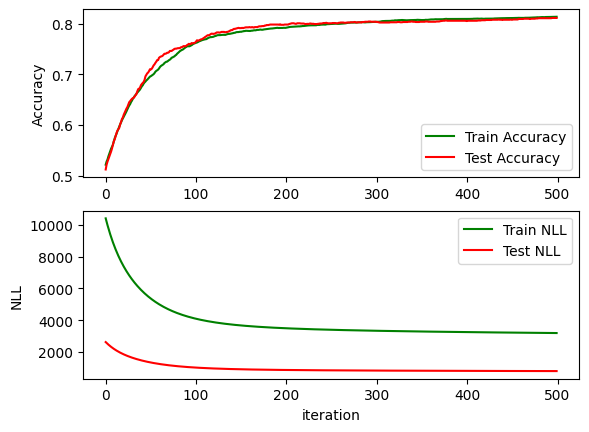

In [345]:
plot_evolution(train_acc, test_acc, train_nll, test_nll)

#### Implementare folosind biblioteca scikit-learn

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pregătirea datelor
X, X_train, X_test, T, T_train, T_test = get_data(full_file, train_file, test_file)

# Definirea modelului
model = LogisticRegression()

# Antrenarea modelului
model.fit(X_train, T_train)

# Evaluarea modelului
T_pred = model.predict(X_test)
accuracy = accuracy_score(T_test, T_pred)
print("Accuracy:", accuracy)

Accuracy: 0.832


### Multi-Layered Perceptron (MLP)

#### Implementare manuală

#### Implementare folosind biblioteca sckit-learn

In [347]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Pregătirea datelor
X, X_train, X_test, T, T_train, T_test = get_data(full_file, train_file, test_file)

# Pregătire model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Antrenarea modelului
model.fit(X_train, T_train)

# Paso 6: Evaluarea modelului
T_pred = model.predict(X_test)
accuracy = accuracy_score(T_test, T_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8095


## Evaluarea algoritmilor

In [27]:
# Citirea datelor

# Preprocesarea datelor

# Utilizarea unui model de regresie pentru a prezice salariul

# Utilizarea unui model MLP pentru a prezice salariul